In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
sns.set()
sns.set_palette("colorblind")

In [58]:
logdir = Path('/data/logs/bigmodelbiganew/')

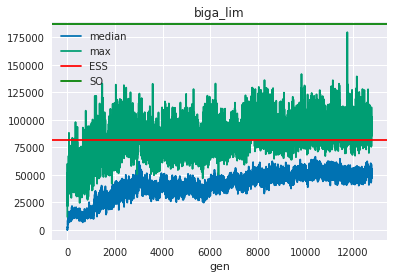

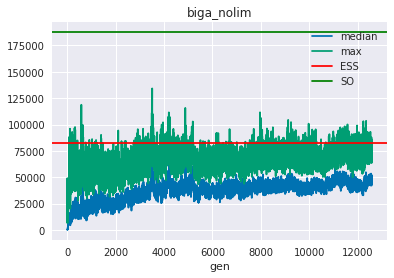

In [60]:
rsize = 1

cond = 'big' # bigmodel_ab_new

for path in sorted(list(logdir.glob('{}*'.format(cond)))):
    plt.figure()

    try:
        df = pd.read_csv(path / 'fitnesslog.txt', delimiter="\t")
    except FileNotFoundError:
        test = True
        i = 0
        dft = []
        while test:
            try:
                c = pd.read_csv(path / 'rep{}'.format(i) / 'fitnesslog.txt', delimiter="\t")
            except FileNotFoundError:
                test = False
            else:
                c['bigrep'] = i
                dft.append(c)
                i += 1
            df = pd.concat(dft, ignore_index=True)
    if df.empty:
        continue
    df.query('gen < {}'.format(df['gen'].max()-1), inplace=True)
    try: 
        df['fitness'] = df['fit']
    except:
        pass
    fit = df.groupby(('gen', 'ind'), as_index=False)['fitness'].mean()
    fit.groupby('gen')['fitness'].median().rolling(rsize).mean().plot(label="median")
    fit.groupby('gen')['fitness'].max().rolling(rsize).mean().plot(label="max")
    #fit.groupby('gen')['fitness'].min().rolling(rsize).mean().plot()
    if cond.startswith('big'):
        plt.axhline(5000*21.875*0.75, color="r", label="ESS")
        plt.axhline(5000*50*0.75, color="g", label="SO")
    if cond.startswith('correp'):
        plt.axhline(2500*1*0.90, color="g", label="2")
        plt.axhline(2500*0.5*0.90, color="r", label="1 ou 3")
    plt.title(path.name)
    plt.legend()